In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

%matplotlib inline

## Linear Regression

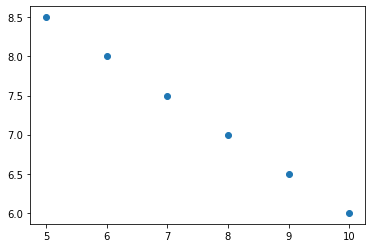

In [2]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8.,7.5,7.,6.5,6.]

plt.scatter(car_prices, units_sold)

In [3]:
prices = np.array(car_prices).reshape(-1,1)
units = np.array(units_sold).reshape(-1,1)


In [4]:
P = torch.from_numpy(prices).float().requires_grad_(True)
U = torch.from_numpy(units).float()

In [5]:
model = nn.Linear(1,1) # Linear regression

loss_func = nn.MSELoss() # MSE Loss function

opt = optim.SGD(model.parameters(), lr=0.015) # lr = learning rate

losses = []

iterations = 2000

for i in range(iterations):
    pred = model(P)
    loss = loss_func(pred, U)
    losses.append(loss.data)
    
    opt.zero_grad()
    loss.backward()
    opt.step()

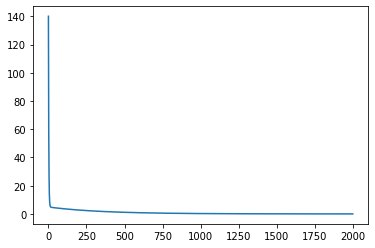

In [6]:
plt.plot(range(iterations), losses)

In [7]:
x = torch.Tensor([[4.0]])
pred = model(x)
pred

tensor([[8.7327]], grad_fn=<AddmmBackward>)

In [8]:
x = torch.Tensor([[14.0]])
pred = model(x)
pred

tensor([[4.4212]], grad_fn=<AddmmBackward>)

## Logistic Regression

In [9]:
n = 300 
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[ 4.99377013,  0.35901919],
       [-6.38085254, -0.14681274],
       [-0.77665567,  1.77743808],
       [ 2.54006565, -4.11515305],
       [ 2.08534606,  0.90218793],
       [-2.1965458 ,  2.25533372],
       [ 1.54100945, -2.32232215],
       [-0.9265944 , -0.33764012],
       [ 1.78861528,  5.97220569],
       [-5.82030151,  0.9944262 ],
       [-2.21163782, -3.17678579],
       [ 3.70002859,  3.52570258],
       [-3.04341614, -4.50132019],
       [-2.98196223, -0.7158132 ],
       [ 0.65372641, -2.44237579],
       [-2.35841901, -3.12339293],
       [ 4.07672701, -0.69677157],
       [ 2.12541299, -0.14543905],
       [ 0.50355985, -0.46404203],
       [ 1.40683741, -4.16112312],
       [ 1.40544398, -3.7087836 ],
       [ 0.51376844,  1.25997956],
       [-3.87066431, -0.44660426],
       [-6.98125864, -0.56315298],
       [-3.97235466,  1.95854977],
       [-1.30720486, -0.25209848],
       [-3.72684345, -3.24150314],
       [-2.54154694,  2.23439353],
       [ 3.76481335,

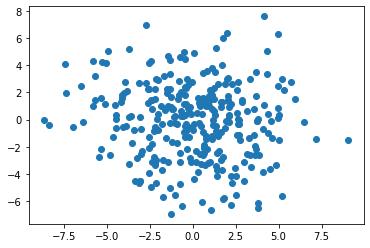

In [10]:
plt.scatter(data[:, 0], data[:,1])

In [11]:
data[:h, :] = data[:h, :] - 3*np.ones((h,dimen))
data[h:, :] = data[h:, :] - 3*np.ones((h,dimen))

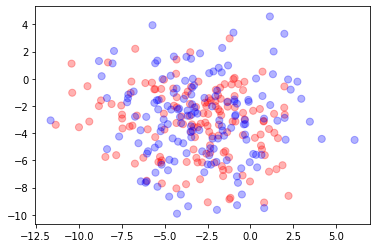

In [12]:
colors = ['red', 'blue']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:, 0], data[:,1], c=color, s=50, alpha = .3)

In [13]:
target = np.array([0]*h + [1]*h).reshape(n,1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([300, 2]), torch.Size([300, 1]))

tensor(0.6914, grad_fn=<BinaryCrossEntropyBackward>)

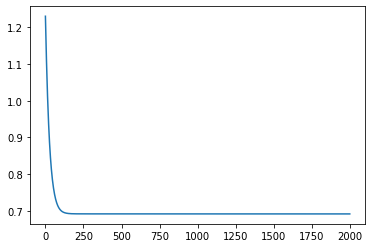

In [14]:
model = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())

loss_func = nn.BCELoss()

opt = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
    pred = model(x)
    loss = loss_func(pred, y)
    losses.append(loss.data)
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    
plt.plot(range(iterations), losses)
loss

In [15]:
red = torch.Tensor([[-5, -6]])
pred = model(red).data[0][0] > 0.5
colors[pred]

'red'

In [16]:
blue = torch.Tensor([[8, 6]])
pred = model(blue).data[0][0] > 0.5
colors[pred]

'blue'

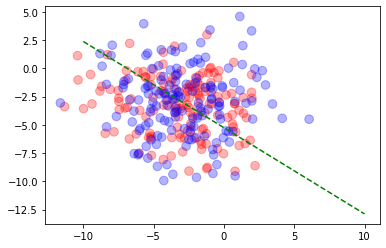

In [17]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:, 0], data[:,1], c=color, s=75, alpha = .3)

x_ax = np.linspace(-10,10,n)
y_ax = -(w1[0] + x_ax*w0[0][0]) / w0[0][1]

plt.plot(x_ax, y_ax, 'g--')